In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px

In [24]:
df_ = pd.read_hdf('../../data/caterpillar/labeled_caterpillar_data/labeled_1232423_1.h5', key='star')
print(len(df_))
df_.head()

1043954


,jzstar,jrstar,jphistar,vstar,idstar,estar,cluster_id
1023,3.913976,2.942013,0.998913,154.771205,162.0,79174.944423,1
1024,3.371582,3.689807,-0.630306,266.271465,162.0,70465.107961,1
1025,3.846088,3.880464,-0.308512,301.778262,162.0,82199.008300,1
1026,3.103048,3.229659,-1.092135,353.939071,162.0,98720.807170,1
1027,2.927352,3.279956,-1.074737,386.983947,162.0,121724.789817,1


In [25]:
sunx, suny, sunz = 0,0,8/1000 # all units in kiloparsecs
radius = 0.05 # 50 kiloparsecs

In [ ]:
df_ = df_.loc[(df_['xstar']-sunx)**2 + (df_['ystar']-suny)**2 + (df_['zstar']-sunz)**2 < radius**2]

In [21]:
chosen_ids = np.random.choice(len(df_), min(len(df_), 1000000))
df = df_.iloc[chosen_ids].copy()

<AxesSubplot: xlabel='jphistar', ylabel='estar'>

/home/michaelyhuang/venv/gaia/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/michaelyhuang/venv/gaia/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


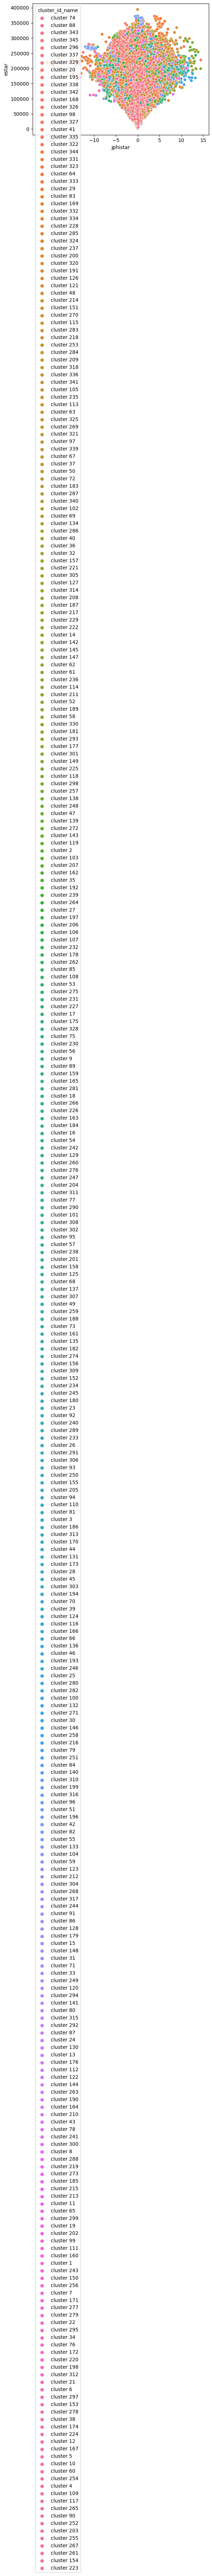

In [22]:
df['cluster_id_name'] = [f'cluster {i}' for i in df['cluster_id']]
sns.scatterplot(data=df, x='jphistar', y='estar')

In [13]:
cluster_ids = [i for i,c in Counter(df['cluster_id']).most_common()[:10]]
print(cluster_ids)
print(Counter(df['cluster_id']).most_common()[:10])

[345, 343, 329, 342, 344, 335, 333, 327, 331, 338]
[(345, 3687), (343, 2275), (329, 717), (342, 365), (344, 262), (335, 163), (333, 126), (327, 126), (331, 101), (338, 88)]


In [14]:
df_small = df.loc[df['cluster_id'].isin(cluster_ids)]

In [15]:
df_small.head()

,jzstar,jrstar,jphistar,vstar,idstar,estar,cluster_id,cluster_id_name
283704,0.035334,0.097995,0.542904,368.162742,181948.0,88366.864741,345,cluster 345
69547,0.748664,0.727235,0.564828,471.097322,181948.0,163611.927229,345,cluster 345
5176,2.841365,0.938252,3.630763,297.530991,216200.0,113633.972449,342,cluster 342
147382,0.039008,0.106793,-0.747289,394.275516,231816.0,104333.780738,343,cluster 343
81914,0.055778,0.011501,-0.394577,396.214825,231816.0,90146.638168,343,cluster 343


## Plotting Caterpillar Data

<AxesSubplot: xlabel='jrstar', ylabel='jzstar'>

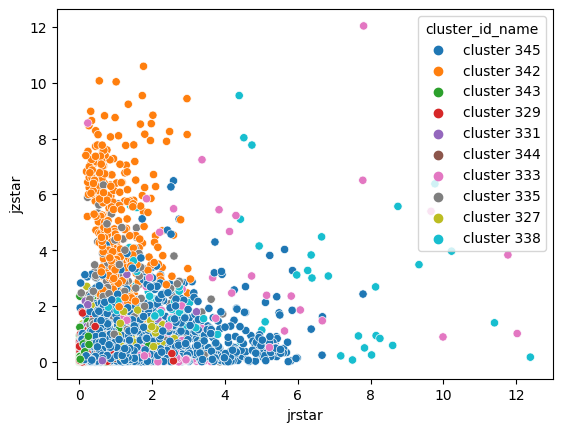

In [17]:
sns.scatterplot(data=df_small, x='jrstar', y='jzstar', hue='cluster_id_name')

<AxesSubplot:>

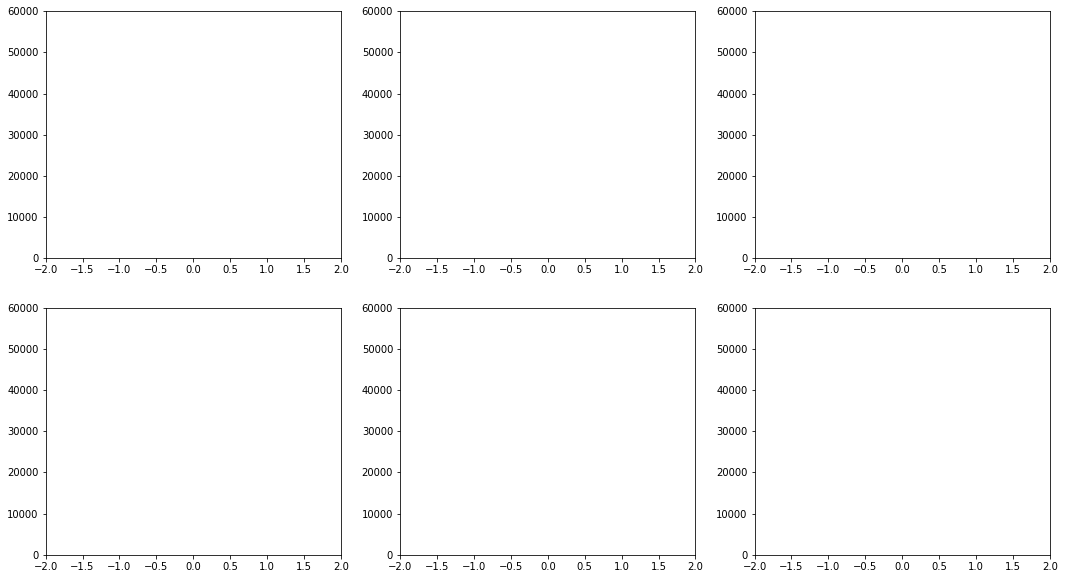

In [54]:
sample_ids = np.random.choice(len(df_small), min(len(df_small), 2000), replace=False)
df_small_ = df_small.iloc[sample_ids].copy()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
df_small_1 = df_small_.loc[df_small_['cluster_id'] == 80]
df_small_2 = df_small_.loc[df_small_['cluster_id'] == 79]
df_small_3 = df_small_.loc[df_small_['cluster_id'] == 74]
df_small_4 = df_small_.loc[df_small_['cluster_id'] == 76]
df_small_5 = df_small_.loc[df_small_['cluster_id'] == 78]
df_small_6 = df_small_.loc[df_small_['cluster_id'] == 50]

[ax.set_ylim(0, 60000) for ax in axes.flatten()]
[ax.set_xlim(-2, 2) for ax in axes.flatten()]


sns.scatterplot(data=df_small_1, ax=axes[0,0], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_2, ax=axes[0,1], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_3, ax=axes[0,2], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_4, ax=axes[1,0], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_5, ax=axes[1,1], x='jphistar', y='estar', hue='cluster_id_name')
sns.scatterplot(data=df_small_6, ax=axes[1,2], x='jphistar', y='estar', hue='cluster_id_name')

<AxesSubplot:>

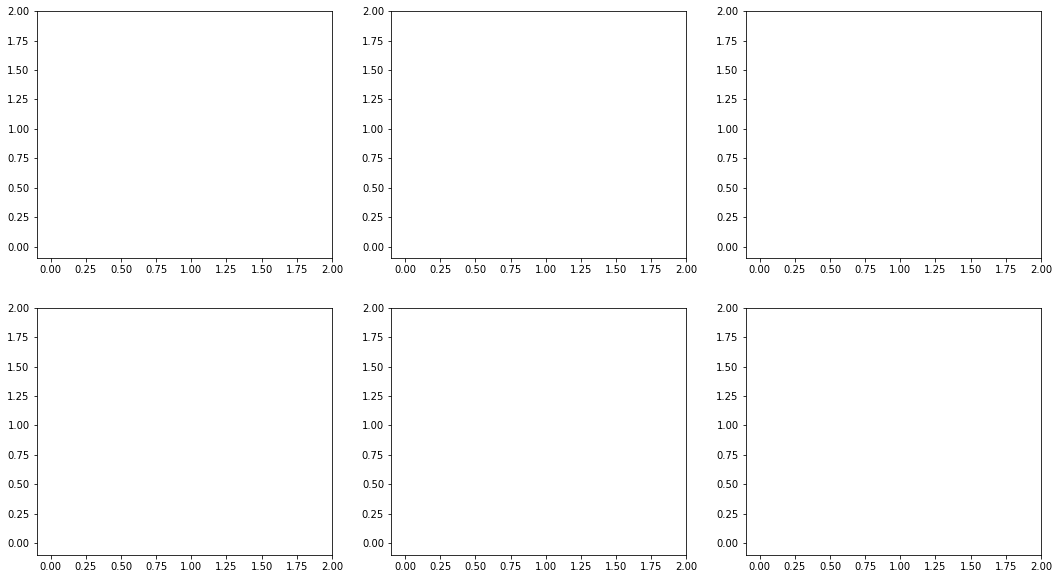

In [55]:
sample_ids = np.random.choice(len(df_small), min(len(df_small), 2000), replace=False)
df_small_ = df_small.iloc[sample_ids].copy()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
df_small_1 = df_small_.loc[df_small_['cluster_id'] == 80]
df_small_2 = df_small_.loc[df_small_['cluster_id'] == 79]
df_small_3 = df_small_.loc[df_small_['cluster_id'] == 74]
df_small_4 = df_small_.loc[df_small_['cluster_id'] == 76]
df_small_5 = df_small_.loc[df_small_['cluster_id'] == 78]
df_small_6 = df_small_.loc[df_small_['cluster_id'] == 50]

[ax.set_ylim(-0.1, 2) for ax in axes.flatten()]
[ax.set_xlim(-0.1, 2) for ax in axes.flatten()]


sns.scatterplot(data=df_small_1, ax=axes[0,0], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_2, ax=axes[0,1], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_3, ax=axes[0,2], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_4, ax=axes[1,0], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_5, ax=axes[1,1], x='jzstar', y='jrstar', hue='cluster_id_name')
sns.scatterplot(data=df_small_6, ax=axes[1,2], x='jzstar', y='jrstar', hue='cluster_id_name')

## Simple Clustering on Caterpillar Data

In [22]:
import sys
sys.path.append('../../')
from cluster_analysis import *
from evaluation_metrics import *
from neural_dataset import *

In [23]:
feature_columns = ['estar', 'jrstar', 'jzstar', 'jphistar']
df_norm = pd.DataFrame({'mean':{feature : df[feature].mean() for feature in feature_columns}, \
                        'std':{feature : df[feature].std() for feature in feature_columns}})

In [25]:
dataset = ClusterDataset(df, feature_columns, 'cluster_id', feature_norms=df_norm)
features = dataset.features.numpy()
labels = dataset.labels.numpy()

In [26]:
def evaluate_once(features, labels, clusterer):
    clusterer.add_data(features)
    clusters = clusterer.fit()
    cluster_eval = ClusterEvalAll(clusters, labels)
    print(cluster_eval())
    return cluster_eval()

In [29]:
clusterer = C_HDBSCAN(metric='manhattan', min_cluster_size=10, min_samples=5, cluster_selection_method='eom')
evaluate_once(features, labels, clusterer)

[ 4  6 53 59 81 82]
[0 6 1 3 5 4]
{'IoU_TP': 5, 'IoU_T': 126, 'IoU_P': 8, 'IoU_precision': 0.625, 'IoU_recall': 0.03968253968253968, 'IoU_F1': 0.07462686567164178, 'Mode_TP': 6, 'Mode_T': 126, 'Mode_P': 8, 'Mode_precision': 0.75, 'Mode_recall': 0.047619047619047616, 'Mode_F1': 0.08955223880597014, 'Mode_TP_C': 3768, 'Mode_recall_C': 0.09017590044274261, 'Purity': 0.09132463802800048, 'AMI': 0.044270351659702736, 'ARand': 0.0014382765591704426, 'ModeSoft_TP': 6, 'ModeSoft_T': 126, 'ModeSoft_P': 8, 'ModeSoft_precision': 0.75, 'ModeSoft_recall': 0.047619047619047616, 'ModeSoft_F1': 0.08955223880597014, 'ModeSoft_TP_C': 3731.4471428569263, 'ModeSoft_recall_C': 0.0893011162583924, 'ModeProb_TP': 6, 'ModeProb_T': 126, 'ModeProb_P': 8, 'ModeProb_precision': 0.75, 'ModeProb_recall': 0.047619047619047616, 'ModeProb_F1': 0.08955223880597014}


{'IoU_TP': 5,
 'IoU_T': 126,
 'IoU_P': 8,
 'IoU_precision': 0.625,
 'IoU_recall': 0.03968253968253968,
 'IoU_F1': 0.07462686567164178,
 'Mode_TP': 6,
 'Mode_T': 126,
 'Mode_P': 8,
 'Mode_precision': 0.75,
 'Mode_recall': 0.047619047619047616,
 'Mode_F1': 0.08955223880597014,
 'Mode_TP_C': 3768,
 'Mode_recall_C': 0.09017590044274261,
 'Purity': 0.09132463802800048,
 'AMI': 0.044270351659702736,
 'ARand': 0.0014382765591704426,
 'ModeSoft_TP': 6,
 'ModeSoft_T': 126,
 'ModeSoft_P': 8,
 'ModeSoft_precision': 0.75,
 'ModeSoft_recall': 0.047619047619047616,
 'ModeSoft_F1': 0.08955223880597014,
 'ModeSoft_TP_C': 3731.4471428569263,
 'ModeSoft_recall_C': 0.0893011162583924,
 'ModeProb_TP': 6,
 'ModeProb_T': 126,
 'ModeProb_P': 8,
 'ModeProb_precision': 0.75,
 'ModeProb_recall': 0.047619047619047616,
 'ModeProb_F1': 0.08955223880597014}

In [34]:
clusterer = C_GaussianMixture(n_components=126)
evaluate_once(features, labels, clusterer)

[  1   3   4  19  53  59  72  81  82 105]
[  7  93  17  97  32 113  41  10   5  53]
{'IoU_TP': 9, 'IoU_T': 126, 'IoU_P': 126, 'IoU_precision': 0.07142857142857142, 'IoU_recall': 0.07142857142857142, 'IoU_F1': 0.07142857142857142, 'Mode_TP': 42, 'Mode_T': 126, 'Mode_P': 126, 'Mode_precision': 0.3333333333333333, 'Mode_recall': 0.3333333333333333, 'Mode_F1': 0.3333333333333333, 'Mode_TP_C': 4966, 'Mode_recall_C': 0.11884647600813689, 'Purity': 0.2731602249611104, 'AMI': 0.32610344860339985, 'ARand': 0.07663742142115489, 'ModeSoft_TP': 39, 'ModeSoft_T': 126, 'ModeSoft_P': 126, 'ModeSoft_precision': 0.30952380952380953, 'ModeSoft_recall': 0.30952380952380953, 'ModeSoft_F1': 0.30952380952380953, 'ModeSoft_TP_C': 4816.734159999988, 'ModeSoft_recall_C': 0.11527424099557229, 'ModeProb_TP': 10, 'ModeProb_T': 126, 'ModeProb_P': 126, 'ModeProb_precision': 0.07936507936507936, 'ModeProb_recall': 0.07936507936507936, 'ModeProb_F1': 0.07936507936507936}


{'IoU_TP': 9,
 'IoU_T': 126,
 'IoU_P': 126,
 'IoU_precision': 0.07142857142857142,
 'IoU_recall': 0.07142857142857142,
 'IoU_F1': 0.07142857142857142,
 'Mode_TP': 42,
 'Mode_T': 126,
 'Mode_P': 126,
 'Mode_precision': 0.3333333333333333,
 'Mode_recall': 0.3333333333333333,
 'Mode_F1': 0.3333333333333333,
 'Mode_TP_C': 4966,
 'Mode_recall_C': 0.11884647600813689,
 'Purity': 0.2731602249611104,
 'AMI': 0.32610344860339985,
 'ARand': 0.07663742142115489,
 'ModeSoft_TP': 39,
 'ModeSoft_T': 126,
 'ModeSoft_P': 126,
 'ModeSoft_precision': 0.30952380952380953,
 'ModeSoft_recall': 0.30952380952380953,
 'ModeSoft_F1': 0.30952380952380953,
 'ModeSoft_TP_C': 4816.734159999988,
 'ModeSoft_recall_C': 0.11527424099557229,
 'ModeProb_TP': 10,
 'ModeProb_T': 126,
 'ModeProb_P': 126,
 'ModeProb_precision': 0.07936507936507936,
 'ModeProb_recall': 0.07936507936507936,
 'ModeProb_F1': 0.07936507936507936}